<a href="https://colab.research.google.com/github/abdulla41mamun/Colored-PetriNets/blob/main/CPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install snakes graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snakes: filename=SNAKES-0.9.33-py3-none-any.whl size=709879 sha256=0ee119956388975f83cb5a85a32f6973c23c5a337509c2ed4af731054cfdc693
  Stored in directory: /root/.cache/pip/wheels/74/93/d8/1bc3fe2c883bcd0f3bd36944a0f243155790aac2b52e23a6ca
Successfully built snakes


In [13]:
# Install the required libraries
!pip install snakes graphviz


In [21]:
!pip install snakes graphviz


In [24]:
# Import necessary modules from snakes
from snakes.nets import *
from graphviz import Source
import graphviz

# Create a Colored Petri Net (CPN) for an order processing system
net = PetriNet('Order Processing System')

# Define color sets (data types) - orders with customer ID and type (AssemblyRequired or Simple)
net.add_place(Place('Order_Queue', [Token(('C001', 'AssemblyRequired')), Token(('C002', 'Simple'))]))
net.add_place(Place('Preparation', []))
net.add_place(Place('Delivery', []))

# Add transitions for placing, preparing, and delivering orders
net.add_transition(Transition('Place_Order'))
net.add_transition(Transition('Prepare_Order'))
net.add_transition(Transition('Deliver_Order'))

# Define inputs and outputs for transitions using add_input and add_output
net.add_input('Order_Queue', 'Place_Order', MultiArc([Variable('customer_id'), Variable('order_type')]))
net.add_output('Preparation', 'Place_Order', Variable('customer_id'))
net.add_output('Delivery', 'Place_Order', Variable('customer_id'))

net.add_input('Preparation', 'Prepare_Order', Variable('x'))
net.add_output('Delivery', 'Prepare_Order', Variable('x'))

net.add_input('Delivery', 'Deliver_Order', Variable('x'))
net.add_output('Order_Queue', 'Deliver_Order', Variable('x'))

# Add guard conditions to transitions
net.transition('Place_Order').add_guard(Guard('order_type == "AssemblyRequired"'))
net.transition('Place_Order').add_guard(Guard('order_type == "Simple"'))

# Print the Petri Net structure
print(net)

# Visualize the Petri Net using Graphviz
def visualize_petri_net(net):
    # Initialize Graphviz Digraph
    dot = graphviz.Digraph()

    # Add places (as circles) and transitions (as boxes)
    for place in net.place():
        dot.node(place.name, shape="circle", label=place.name)
    for transition in net.transition():
        dot.node(transition.name, shape="box", label=transition.name)

    # Add arcs between places and transitions
    for arc in net.arc():
        if arc.transition.name == 'Place_Order':
            dot.edge(arc.place.name, arc.transition.name, label="input")
        else:
            dot.edge(arc.transition.name, arc.place.name, label="output")

    return dot

# Render and display the Petri Net
petri_net_viz = visualize_petri_net(net)
petri_net_viz.render('petri_net_output', format='png', cleanup=True)
petri_net_viz


AttributeError: 'Transition' object has no attribute 'add_guard'

Order Processing System


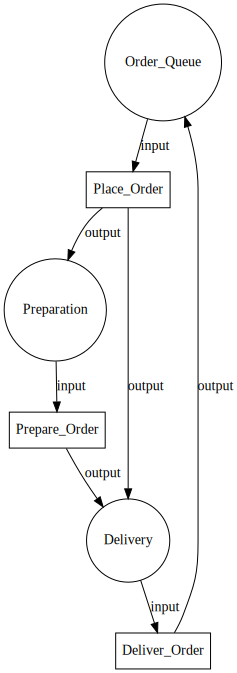

In [31]:
# Import necessary modules from snakes
from snakes.nets import *
from graphviz import Source
import graphviz

# Create a Colored Petri Net (CPN) for an order processing system
net = PetriNet('Order Processing System')

# Define color sets (data types) - orders with customer ID and type (AssemblyRequired or Simple)
net.add_place(Place('Order_Queue', [Token(('C001', 'AssemblyRequired')), Token(('C002', 'Simple'))]))
net.add_place(Place('Preparation', []))
net.add_place(Place('Delivery', []))

# Add transitions for placing, preparing, and delivering orders
net.add_transition(Transition('Place_Order'))
net.add_transition(Transition('Prepare_Order'))
net.add_transition(Transition('Deliver_Order'))

# Define inputs and outputs for transitions using add_input and add_output
net.add_input('Order_Queue', 'Place_Order', MultiArc([Variable('customer_id'), Variable('order_type')]))
net.add_output('Preparation', 'Place_Order', Variable('customer_id'))
net.add_output('Delivery', 'Place_Order', Variable('customer_id'))

net.add_input('Preparation', 'Prepare_Order', Variable('x'))
net.add_output('Delivery', 'Prepare_Order', Variable('x'))

net.add_input('Delivery', 'Deliver_Order', Variable('x'))
net.add_output('Order_Queue', 'Deliver_Order', Variable('x'))

# Add guard condition to transition using Expression
net.transition('Place_Order').guard = Expression('order_type == "AssemblyRequired" or order_type == "Simple"')

# Print the Petri Net structure
print(net)

# Visualize the Petri Net using Graphviz
def visualize_petri_net(net):
    # Initialize Graphviz Digraph
    dot = graphviz.Digraph()

    # Add places (as circles) and transitions (as boxes)
    for place in net.place():
        dot.node(place.name, shape="circle", label=place.name)
    for transition in net.transition():
        dot.node(transition.name, shape="box", label=transition.name)

    # Add arcs between places and transitions (both inputs and outputs)
    for transition in net.transition():
        for place, arc in transition.input():
            dot.edge(place.name, transition.name, label="input")
        for place, arc in transition.output():
            dot.edge(transition.name, place.name, label="output")

    return dot

# Render and display the Petri Net
petri_net_viz = visualize_petri_net(net)
petri_net_viz.render('petri_net_output', format='png', cleanup=True)
petri_net_viz
